# Movie Gross

## Exploratory Data Analysis

### Step 1. Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `info`
- `describe`

In [5]:
df_movie_gross.shape

(3387, 5)

In [6]:
df_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [7]:
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [8]:
df_movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


### Step 2. Data Preparation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming columns
- Feature creation

In [9]:
df_movie_gross.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [10]:
df_movie_gross = df_movie_gross[['title', #'studio', 
                                 'domestic_gross', 'foreign_gross', 'year']].copy()
df_movie_gross

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
3382,The Quake,6200.0,NaN,2018
3383,Edward II (2018 re-release),4800.0,NaN,2018
3384,El Pacto,2500.0,NaN,2018
3385,The Swan,2400.0,NaN,2018


In [11]:
df_movie_gross.info()
df_movie_gross.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [12]:
df_movie_gross.loc[df_movie_gross.duplicated(subset='title')]

,title,domestic_gross,foreign_gross,year
3045,Bluebeard,43100.0,NaN,2017


In [13]:
df_movie_gross[df_movie_gross.title == 'Bluebeard']

,title,domestic_gross,foreign_gross,year
317,Bluebeard,33500.0,5200,2010
3045,Bluebeard,43100.0,NaN,2017


In [14]:
df_movie_gross.isna().sum()

title                0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [15]:
df_movie_gross[df_movie_gross.isnull().any(axis=1)]

,title,domestic_gross,foreign_gross,year
222,Flipped,1800000.0,NaN,2010
230,It's a Wonderful Afterlife,NaN,1300000,2010
254,The Polar Express (IMAX re-issue 2010),673000.0,NaN,2010
267,Tiny Furniture,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),366000.0,NaN,2010
...,...,...,...,...
3382,The Quake,6200.0,NaN,2018
3383,Edward II (2018 re-release),4800.0,NaN,2018
3384,El Pacto,2500.0,NaN,2018
3385,The Swan,2400.0,NaN,2018


In [16]:
# Drop null values
df_movie_gross.dropna()

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000,2010
1,Alice in Wonderland (2010),334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000,2010
3,Inception,292600000.0,535700000,2010
4,Shrek Forever After,238700000.0,513900000,2010
...,...,...,...,...
3275,I Still See You,1400.0,1500000,2018
3286,The Catcher Was a Spy,725000.0,229000,2018
3309,Time Freak,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,93200.0,5200,2018


In [17]:
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [18]:
df_movie_gross = df_movie_gross[['title', #'studio', 
                                 'domestic_gross', #'foreign_gross', 
                                 'year']].copy()
df_movie_gross

,title,domestic_gross,year
0,Toy Story 3,415000000.0,2010
1,Alice in Wonderland (2010),334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,2010
3,Inception,292600000.0,2010
4,Shrek Forever After,238700000.0,2010
...,...,...,...
3382,The Quake,6200.0,2018
3383,Edward II (2018 re-release),4800.0,2018
3384,El Pacto,2500.0,2018
3385,The Swan,2400.0,2018


In [19]:
df_movie_gross = df_movie_gross.dropna().reset_index(drop=True)
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3359 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   year            3359 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 78.9+ KB


In [20]:
df_movie_gross

,title,domestic_gross,year
0,Toy Story 3,415000000.0,2010
1,Alice in Wonderland (2010),334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,2010
3,Inception,292600000.0,2010
4,Shrek Forever After,238700000.0,2010
...,...,...,...
3354,The Quake,6200.0,2018
3355,Edward II (2018 re-release),4800.0,2018
3356,El Pacto,2500.0,2018
3357,The Swan,2400.0,2018


### Step 3. Feature Understanding
- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

#### Bar Graph of Movies' Gross Revenues

In [21]:
df_movie_gross.sort_values(by='domestic_gross', ascending=False).head(10)

,title,domestic_gross,year
1849,Star Wars: The Force Awakens,936700000.0,2015
3052,Black Panther,700100000.0,2018
3051,Avengers: Infinity War,678800000.0,2018
1850,Jurassic World,652300000.0,2015
720,Marvel's The Avengers,623400000.0,2012
2731,Star Wars: The Last Jedi,620200000.0,2017
3054,Incredibles 2,608600000.0,2018
2299,Rogue One: A Star Wars Story,532200000.0,2016
2732,Beauty and the Beast (2017),504000000.0,2017
2300,Finding Dory,486300000.0,2016


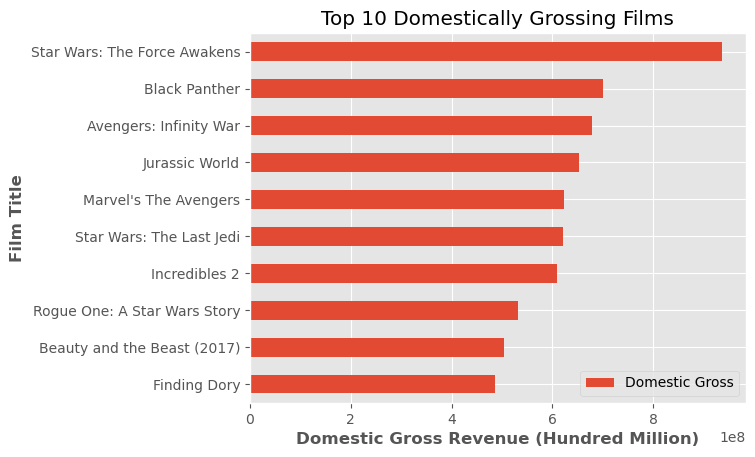

In [22]:
ax = df_movie_gross.sort_values(by='domestic_gross', ascending=False).head(10) \
    .sort_values(by='domestic_gross', ascending=True) \
    .plot(kind='barh', x='title', y='domestic_gross', label='Domestic Gross')
ax.set_title('Top 10 Domestically Grossing Films')
ax.set_ylabel('Film Title', fontweight='bold')
ax.set_xlabel('Domestic Gross Revenue (Hundred Million)', fontweight='bold')
plt.show()

#### Histograms of Movies' Gross Revenues

In [23]:
def render_distribution_gross_revenue(ax, data=df_movie_gross, column='domestic_gross', boundary=200000000, direction='greater'):
    if direction == 'greater':
        sns.histplot(data=data[data[column] >= boundary][column], bins = 20, kde = True, ax=ax)
        ax.set_title('Frequency of Domestic Gross Revenue Amongst Various Titles')
        ax.set_xlabel(f'Film Domestic Gross Revenue Over ${boundary:,.0f}')
        ax.set_ylabel('Frequency')
    elif direction == 'lesser':
        sns.histplot(data=data[data[column] <= boundary][column], bins = 20, kde = True, ax=ax)
        ax.set_title('Frequency of Domestic Gross Revenue Amongst Various Titles')
        ax.set_xlabel(f'Film Domestic Gross Revenue Under ${boundary:,.0f}')
        ax.set_ylabel('Frequency')
    plt.tight_layout()
def render_kde_gross_revenue(ax, data=df_movie_gross, column='domestic_gross', boundary=200000000, direction='greater'):
    if direction == 'greater':
        sns.kdeplot(data=data[data[column] >= boundary][column], ax=ax)
        ax.set_title('Frequency of Domestic Gross Revenue Amongst Various Titles')
        ax.set_xlabel(f'Film Domestic Gross Revenue Over ${boundary:,.0f}')
        ax.set_ylabel('Frequency')
    elif direction == 'lesser':
        sns.kdeplot(data=data[data[column] <= boundary][column], ax=ax)
        ax.set_title('Frequency of Domestic Gross Revenue Amongst Various Titles')
        ax.set_xlabel(f'Film Domestic Gross Revenue Under ${boundary:,.0f}')
        ax.set_ylabel('Frequency')
    plt.tight_layout()

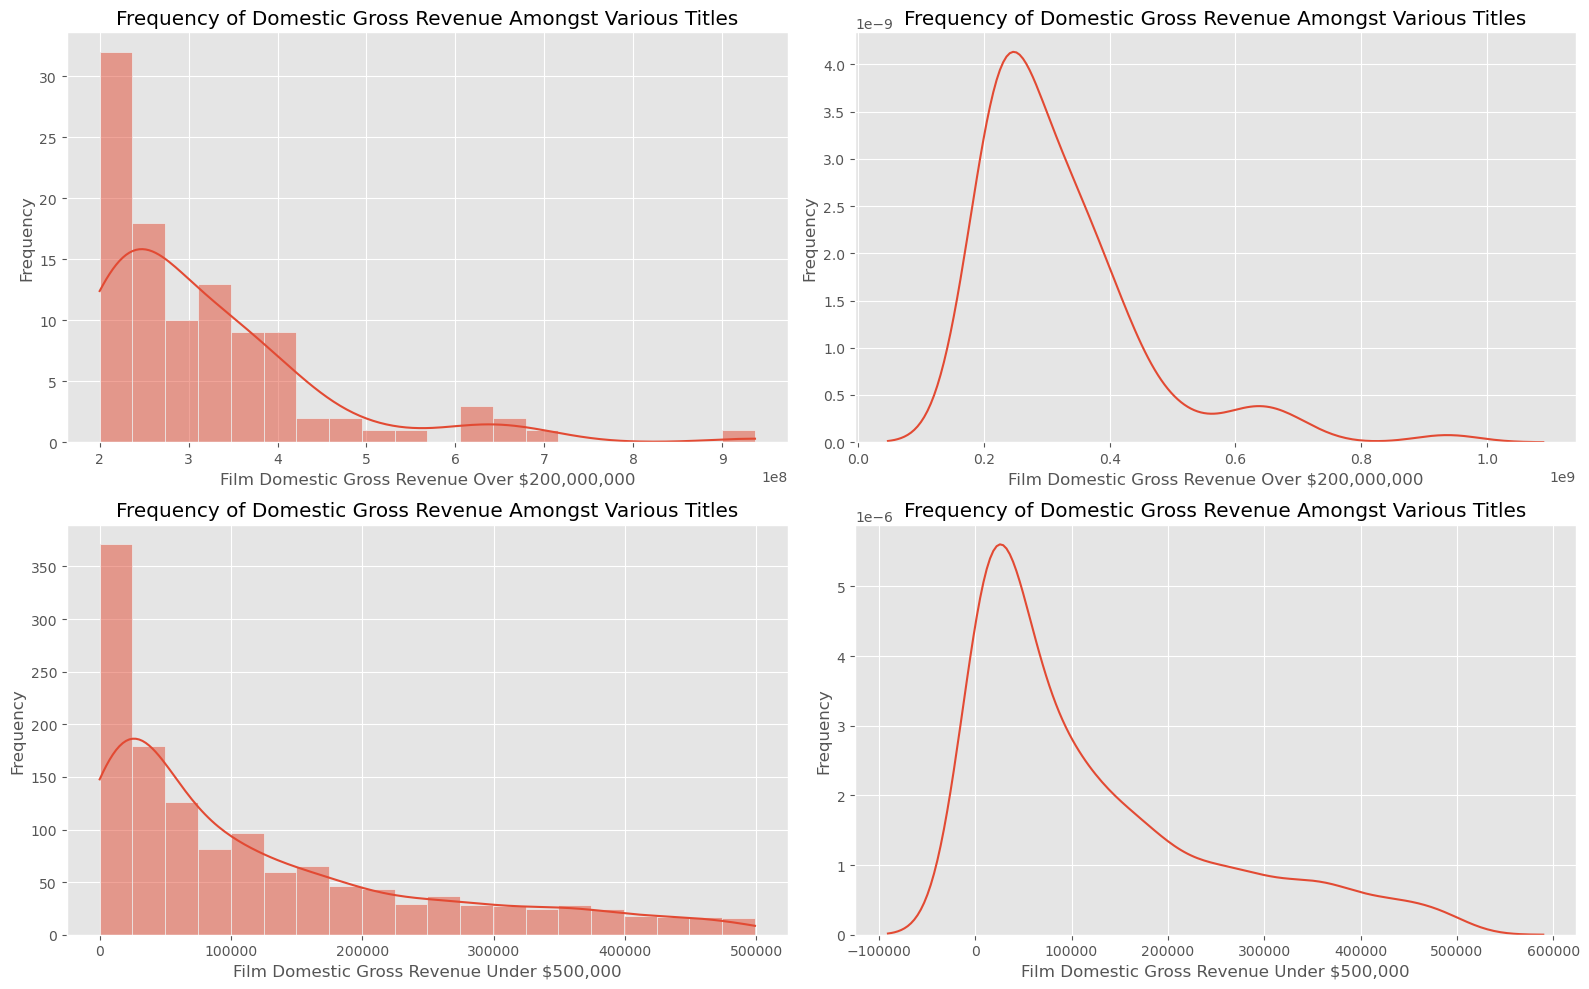

In [24]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(16,10))
render_distribution_gross_revenue(ax=ax1, boundary = 200000000, direction='greater')
render_kde_gross_revenue(ax=ax2, boundary = 200000000, direction='greater')
render_distribution_gross_revenue(ax=ax3, boundary=500000, direction='lesser')
render_kde_gross_revenue(ax=ax4, boundary=500000, direction='lesser')

#### Box Plot of Movies' Gross Revenues

In [25]:
def render_boxplot_gross_revenue(ax=ax, data=df_movie_gross, column='domestic_gross', boundary=200000000, direction='greater'):
    if direction == 'greater':
        sns.boxplot(x=data[data[column] >= boundary][column], ax=ax)
        ax.set_title('Frequency of Domestic Gross Revenue Amongst Various Titles')
        ax.set_xlabel(f'Film Domestic Gross Revenue Over ${boundary:,.0f}')
        ax.set_ylabel('Frequency')
    elif direction == 'lesser':
        sns.boxplot(x=data[data[column] <= boundary][column], ax=ax)
        ax.set_title('Frequency of Domestic Gross Revenue Amongst Various Titles')
        ax.set_xlabel(f'Film Domestic Gross Revenue Under ${boundary:,.0f}')
        ax.set_ylabel('Frequency')
    plt.tight_layout()

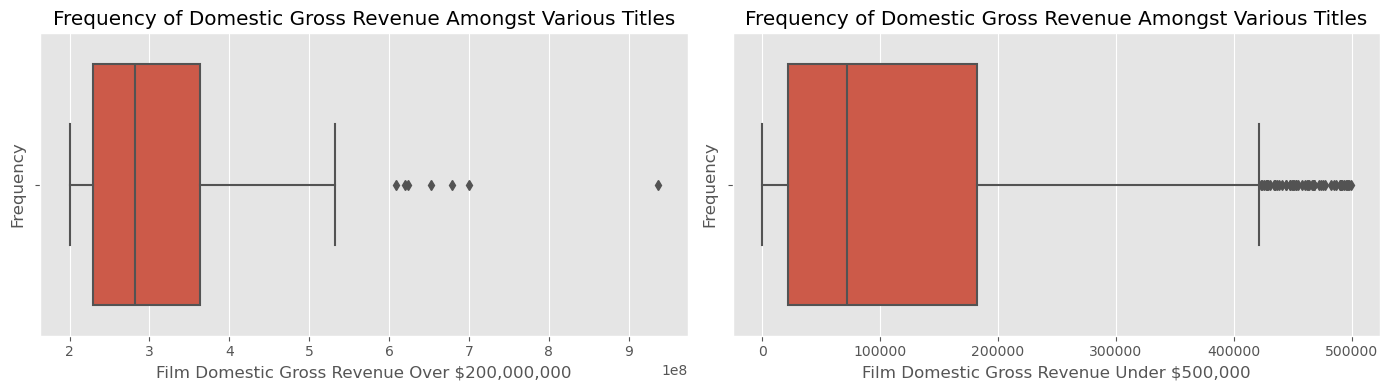

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
render_boxplot_gross_revenue(ax=ax1, boundary = 200000000, direction='greater')
render_boxplot_gross_revenue(ax=ax2, boundary = 500000, direction='lesser')

### Step 4. Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby Comparisons

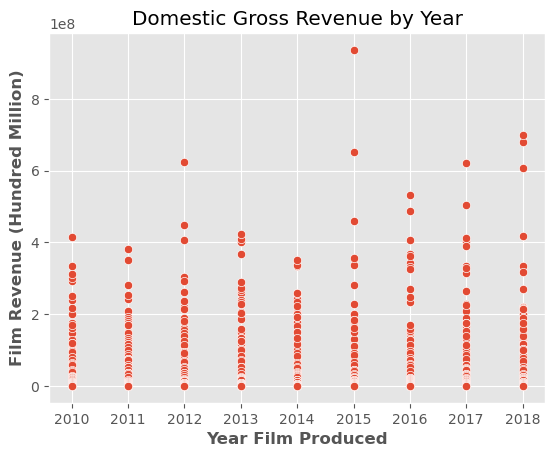

In [27]:
sns.scatterplot(data=df_movie_gross, x='year', y='domestic_gross')
plt.title('Domestic Gross Revenue by Year')
plt.xlabel('Year Film Produced', fontweight='bold')
plt.ylabel('Film Revenue (Hundred Million)', fontweight='bold')
plt.show()

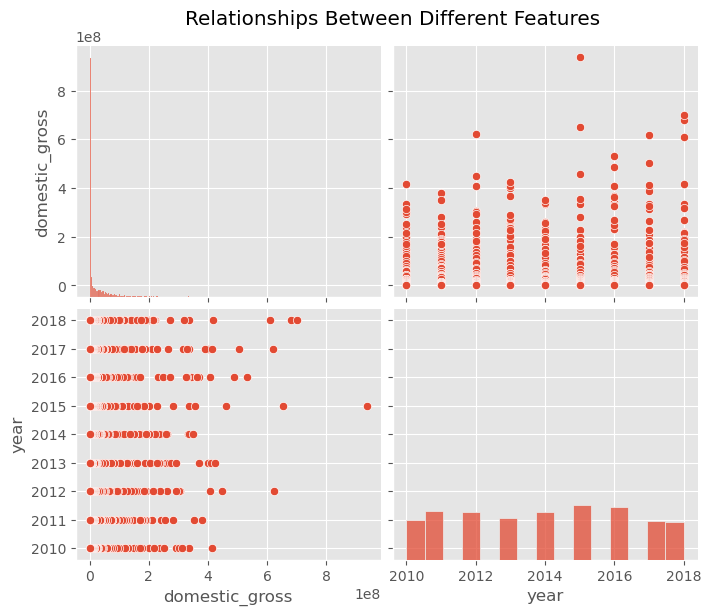

In [28]:
sns.pairplot(df_movie_gross, height=3, aspect=1.2)
plt.title('Relationships Between Different Features', y = 2.1, x=0)
plt.show()

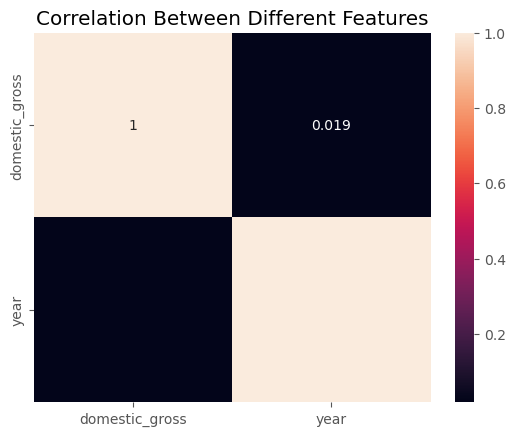

In [29]:
sns.heatmap(df_movie_gross[['domestic_gross','year']].corr(), annot=True)
plt.title('Correlation Between Different Features')
plt.show()

### Step 5. Descriptive Questions About The Data
- Try to ask and answer questions you have about the data using a plot or statistic.

In [30]:
df_movie_gross.head()

,title,domestic_gross,year
0,Toy Story 3,415000000.0,2010
1,Alice in Wonderland (2010),334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,2010
3,Inception,292600000.0,2010
4,Shrek Forever After,238700000.0,2010


What is the total gross revenue by year?

In [31]:
pd.set_option('display.float_format', '${:,.0f}'.format)
total_gross = df_movie_gross.groupby('year')['domestic_gross'].agg(['sum','mean','count']).reset_index().copy()
total_gross = total_gross.rename(columns={'year':'Year', 'sum':'Total_Revenue', 'mean':'Avg_Revenue','count':'Title_Counts'})
total_gross

,Year,Total_Revenue,Avg_Revenue,Title_Counts
0,2010,"$10,156,926,399","$31,445,593",323
1,2011,"$10,064,158,200","$25,350,524",397
2,2012,"$10,876,605,997","$27,675,842",393
3,2013,"$10,792,329,897","$31,282,116",345
4,2014,"$10,337,738,499","$26,439,229",391
5,2015,"$11,051,405,394","$24,613,375",449
6,2016,"$11,253,653,097","$25,989,961",433
7,2017,"$10,933,266,198","$34,166,457",320
8,2018,"$11,091,209,899","$36,010,422",308


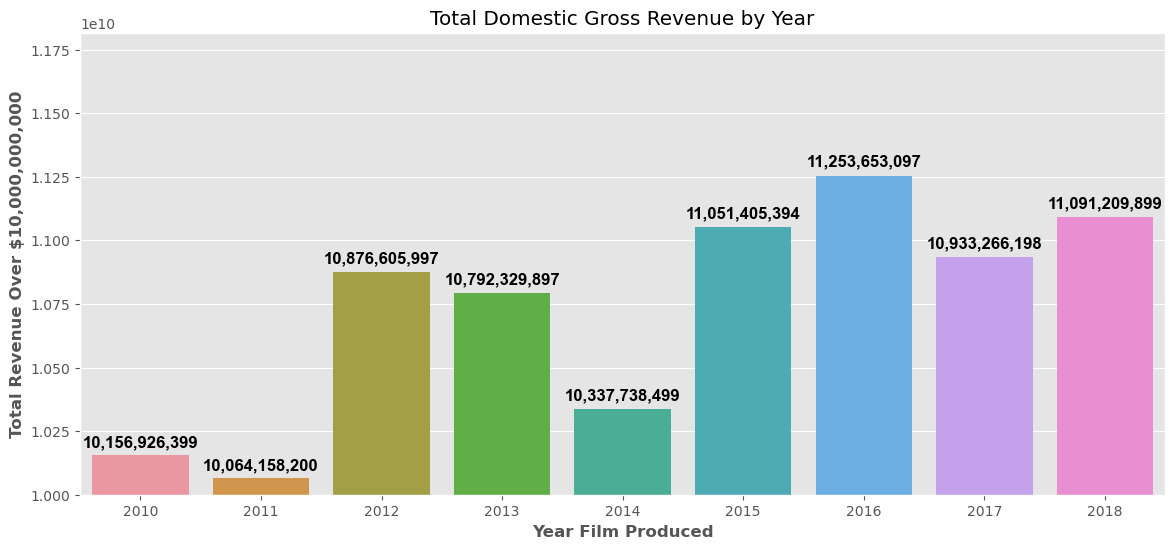

In [32]:
def add_labels(ax, values):
    for i, value in enumerate(values):
        ax.text(i, value * 1.005, f'{value:,.0f}', va='center', ha='center', color='black', rotation=0, font='arial', fontsize=12, fontweight='bold')

filtered_total_gross = total_gross[total_gross['Total_Revenue'] > 1000000000]
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.barplot(x='Year', y='Total_Revenue', data=filtered_total_gross)
add_labels(ax, filtered_total_gross['Total_Revenue'])
plt.title('Total Domestic Gross Revenue by Year')
plt.xlabel('Year Film Produced', fontweight='bold')
plt.ylabel('Total Revenue Over $10,000,000,000', fontweight='bold')
ax.set_ylim(10000000000, ax.get_ylim()[1])
plt.show()

## Movie Info

Step 1. Data Understanding¶
Dataframe shape
head and tail
info
describe

In [33]:
df_movie_info.shape

(1560, 12)

In [41]:
df_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [35]:
df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [40]:
df_movie_info[df_movie_info.box_office.notnull()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,"59,371",98 minutes,IDP Distribution
1546,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,NaN,NaN,"Aug 30, 2002","Oct 7, 2003",$,"794,306",97 minutes,NaN


In [39]:
FILTER = df_movie_info[df_movie_info['box_office'].notnull()]
FILTER['revenue'] = FILTER['box_office'].str.replace(',', '').astype(int)
FILTER

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,revenue
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,600000
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures,41032915
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics,224114
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN,134904
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures,1039869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures,25335935
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment,1416189
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,"59,371",98 minutes,IDP Distribution,59371
1546,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,NaN,NaN,"Aug 30, 2002","Oct 7, 2003",$,"794,306",97 minutes,NaN,794306


In [ ]:
df_movie_info = FILTER
df_movie_info

### Step 2. Data Preparation
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming columns
- Feature creation

### Step 3. Feature Understanding
- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

### Step 4. Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby Comparisons

### Step 5. Descriptive Questions About The Data
- Try to ask and answer questions you have about the data using a plot or statistic.

# Recommending Films for Box Office Success!

![image](https://vip-go.premiumbeat.com/wp-content/uploads/2022/02/vr_2.jpg)

*Image by DOP Eben Bolter on the LED volume stage at Rebellion Film Studios in Oxford, UK.*

# Background

### Loading Tools and Data

Import our data science tools.

In [46]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [47]:
df_movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
df_movie_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='latin1')
df_tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
df_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [48]:
zip_path = 'zippedData/im.db.zip'
extract_path = 'zippedData/'

with zipfile.ZipFile(zip_path,'r') as zip_ref:
    zip_ref.extractall(extract_path)

db_path = os.path.join(extract_path, 'im.db')

conn = sqlite3.connect(db_path)
pd.read_sql("""
    SELECT *
    FROM sqlite_master
    WHERE type = 'table';
""",conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [100]:
df_movie_basics = pd.read_sql("""
    SELECT *
    FROM movie_basics;
""",conn)

df_movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,$175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,$114,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,$122,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,$80,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,$123,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,$116,None


In [99]:
df_directors = pd.read_sql("""
    SELECT *
    FROM directors;
""",conn)

df_directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [101]:
df_known_for = pd.read_sql("""
    SELECT *
    FROM known_for;
""",conn)

df_known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [102]:
df_movie_akas = pd.read_sql("""
    SELECT *
    FROM movie_akas;
""",conn)

df_movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,$0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,$0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,$0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,$0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,$0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,$1
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,$0
331700,tt9880178,1,La atención,None,None,original,None,$1
331701,tt9880178,2,La atención,ES,None,None,None,$0


In [103]:
df_movie_ratings = pd.read_sql("""
    SELECT *
    FROM movie_ratings;
""",conn)

df_movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,$8,31
1,tt10384606,$9,559
2,tt1042974,$6,20
3,tt1043726,$4,50352
4,tt1060240,$6,21
...,...,...,...
73851,tt9805820,$8,25
73852,tt9844256,$8,24
73853,tt9851050,$5,14
73854,tt9886934,$7,5


In [104]:
df_persons = pd.read_sql("""
    SELECT *
    FROM persons;
""",conn)

df_persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [105]:
df_principals = pd.read_sql("""
    SELECT *
    FROM principals;
""",conn)

df_principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


In [106]:
df_writers = pd.read_sql("""
    SELECT *
    FROM writers;
""",conn)

df_writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825
